In [ ]:
!pip install tensorflow

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Insurance claim can be processed.


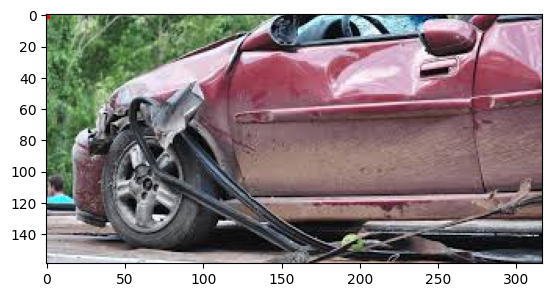

In [11]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load pre-trained DETR model
processor = DetrImageProcessor.from_pretrained('facebook/detr-resnet-50')
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')

# Load and preprocess image
image = Image.open('/content/car insurance.jpg').convert("RGB")
inputs = processor(images=image, return_tensors="pt")

# Model inference
outputs = model(**inputs)

# Post-processing to detect objects
results = processor.post_process_object_detection(outputs, threshold=0.8)[0]

# Analyze detection results (strictly car detection)
valid_claim = False
for label, score, box in zip(results["labels"], results["scores"], results["boxes"]):
    detected_object = model.config.id2label[label.item()]
    #print(f"Detected {detected_object} with confidence {score.item():.3f}")
    if detected_object == 'car' and score.item() > 0.85:
        valid_claim = True

# Decision based on refined detection
if valid_claim:
    print("Insurance claim can be processed.")
else:
    print("Insurance claim cannot be processed due to insufficient evidence of car damage.")

# Visualization
fig, ax = plt.subplots()
ax.imshow(image)

for score, box in zip(results["scores"], results["boxes"]):
    xmin, ymin, xmax, ymax = box.detach().numpy()
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()